# Vorovyov binning

https://pypi.org/project/vorbin/

https://www-astro.physics.ox.ac.uk/~cappellari/software/#binning

## Imports

In [4]:
%config Completer.use_jedi = False # To make auto-complete faster

#Reloads imported files automatically
%load_ext autoreload
%autoreload 2

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

from vorbin.voronoi_2d_binning import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import MultiPoint, Point, Polygon

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.path as mpltPath

from matplotlib_param_funcs import set_matplotlib_params,reset_rcParams
set_matplotlib_params()

## Voronoi

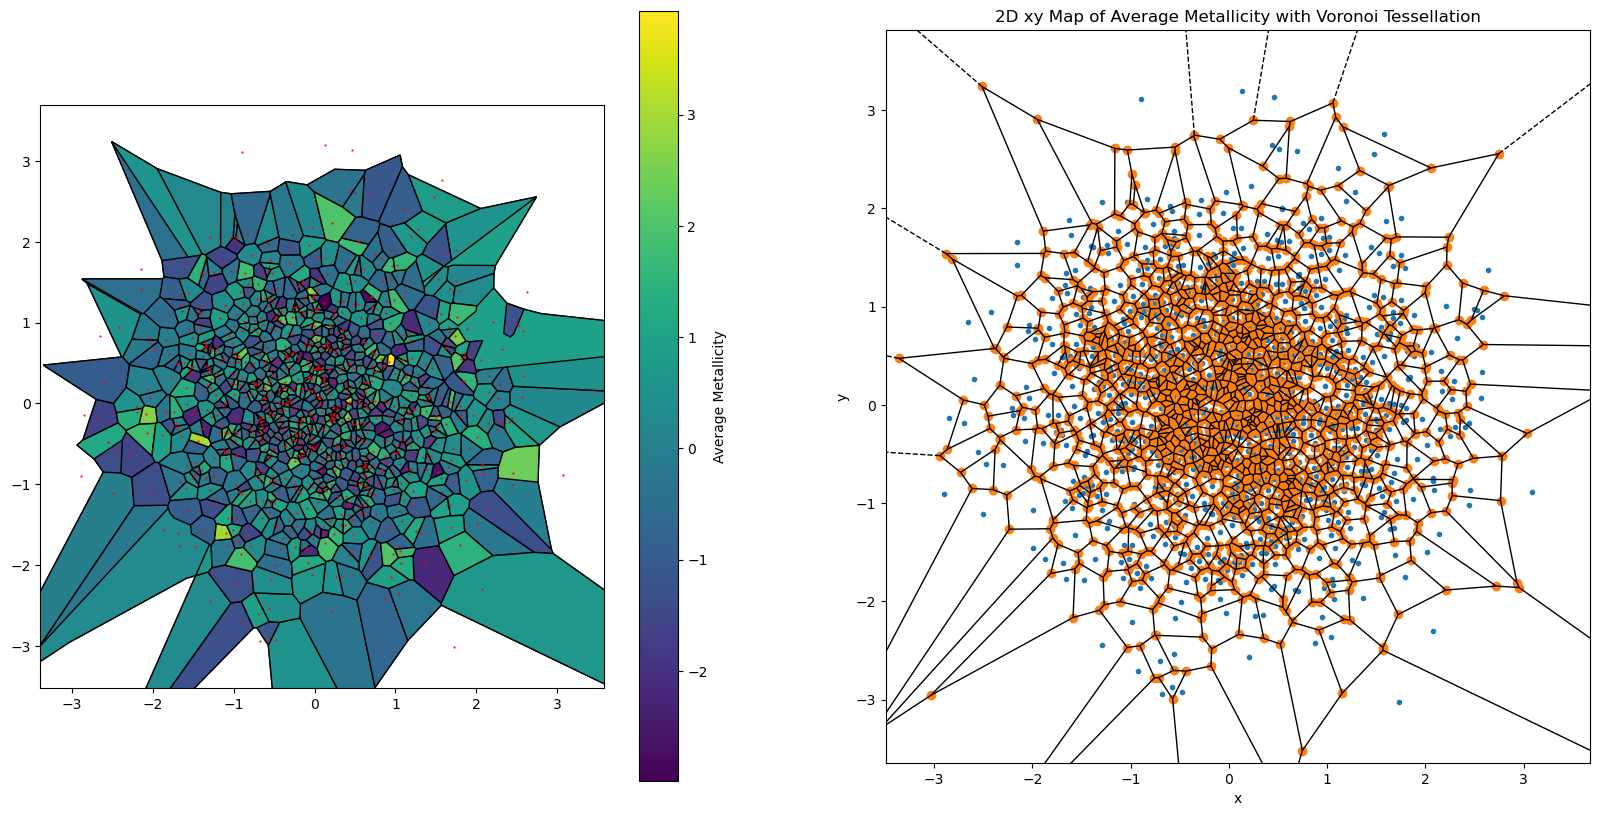

In [26]:
# Generate sample data: x, y, metallicity
N = 1000
x = np.random.normal(size=N)
y = np.random.normal(size=N)
metallicity = np.random.normal(size=N)

# Perform Voronoi tessellation
points = np.column_stack((x, y))
vor = Voronoi(points)

# Calculate average metallicity for each Voronoi cell
avg_metallicity = np.zeros(vor.npoints)
for i, cell in enumerate(vor.point_region):
    if len(vor.regions[cell]) > 0:
        avg_metallicity[i] = metallicity[i]

# Create a 2D xy map
fig, (ax,ax1) = plt.subplots(figsize=(20,20),ncols=2)
ax.set_aspect('equal')
ax1.set_aspect('equal')

voronoi_plot_2d(vor, ax1)

# Plot Voronoi diagram
cmap = cm.viridis
norm = plt.Normalize(avg_metallicity.min(), avg_metallicity.max())

for cell, avg_metal in zip(vor.regions, avg_metallicity):
    if len(cell) > 0:
        polygon = [vor.vertices[i] for i in cell]
        poly = plt.Polygon(polygon, edgecolor='k', lw=1, facecolor=cmap(norm(avg_metal)))
        ax.add_patch(poly)
        
# Scatter plot with fixed red color
scatter = ax.scatter(x, y, c='red', label='Stars', s=0.3)

ax.set_xlim(x.min()-0.5,x.max()+0.5)
ax.set_ylim(y.min()-0.5,y.max()+0.5)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Average Metallicity', shrink=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D xy Map of Average Metallicity with Voronoi Tessellation')
plt.show()

## Vorbin + Voronoi

### Metallicity & its uncertainty

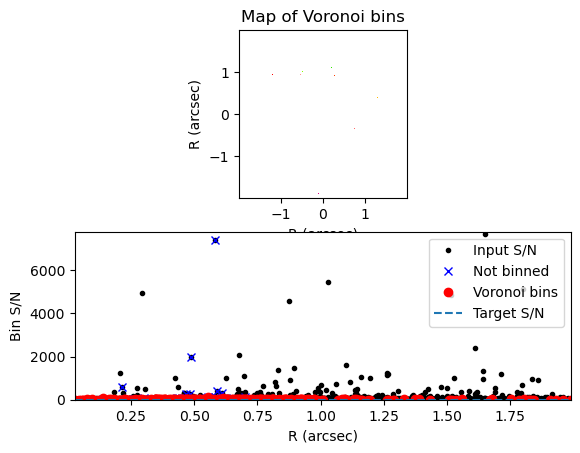

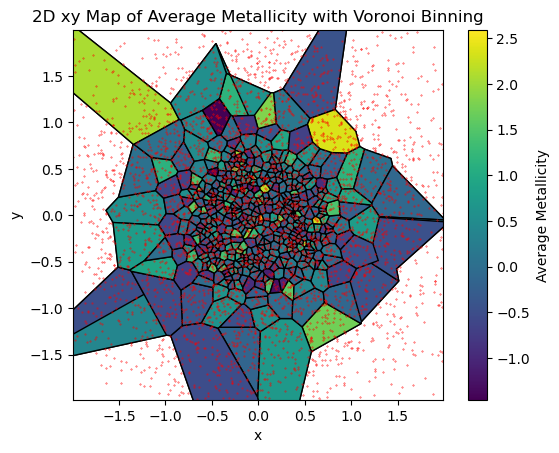

In [19]:
# Generate sample data: x, y, metallicity
N = 5000
x = np.random.normal(size=N)
y = np.random.normal(size=N)
metallicity = np.random.normal(size=N)

in_region = (abs(x)<2)&(abs(y)<2)
x = x[in_region]
y = y[in_region]
metallicity = metallicity[in_region]

# Define the signal and noise for each data point
signal = metallicity
noise = np.random.rand(len(metallicity)) * 0.1  # Example noise values

# Set the target signal-to-noise ratio
target_sn = 10

# Perform Voronoi binning
bin_number, bin_x, bin_y, bin_sn, bin_area, *_ = voronoi_2d_binning(x, y, signal, noise, target_sn, plot=True, wvt=False)

# Compute Voronoi tessellation
vor = Voronoi(np.column_stack((bin_x, bin_y)))

# Calculate average metallicity for each Voronoi cell
unique_bins = np.unique(bin_number)
avg_metallicity = np.zeros(len(unique_bins))

for i, unique_bin in enumerate(unique_bins):
    avg_metallicity[i] = np.mean(metallicity[bin_number == unique_bin])
    
# Create a 2D xy map
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Plot Voronoi diagram
cmap = cm.viridis
norm = plt.Normalize(avg_metallicity.min(), avg_metallicity.max())

for region, avg_metal in zip(vor.regions, avg_metallicity):
    if len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        poly = Polygon(polygon)
        poly = plt.Polygon(poly.exterior.coords, edgecolor='k', lw=1, facecolor=cmap(norm(avg_metal))) # DOES NOT TAKE INTO ACCOUNT THAT BIN INDICES ARE NOT THE SAME!
        ax.add_patch(poly)

# Scatter plot with fixed red color
scatter = ax.scatter(x, y, c='red', label='Stars', s=0.1)
ax.set_xlim(x.min(),x.max()); ax.set_ylim(y.min(),y.max())
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Average Metallicity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D xy Map of Average Metallicity with Voronoi Binning')
plt.show()

#### Taking it apart

Metal length: 905 	 len(bin_number):905 	 max(bin_number):358


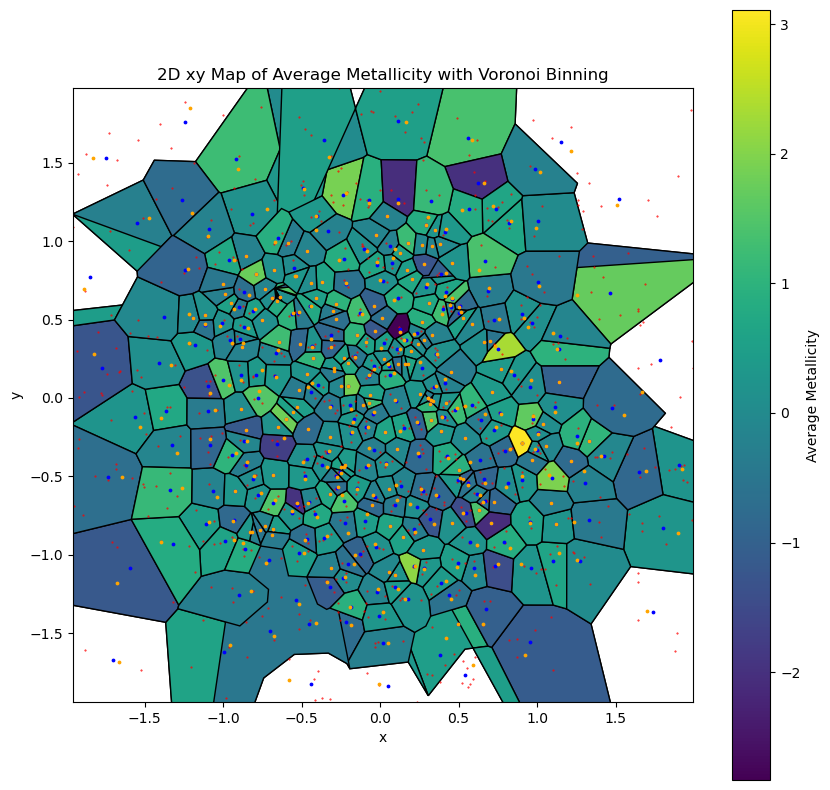

In [49]:
if True: # generate data
    # Generate sample data: x, y, metallicity
    N = 1000
    x = np.random.normal(size=N)
    y = np.random.normal(size=N)
    metallicity = np.random.normal(size=N)

    in_region = (abs(x)<2)&(abs(y)<2)
    x = x[in_region]
    y = y[in_region]
    metallicity = metallicity[in_region]

    # Define the signal and noise for each data point
    signal = metallicity
    noise = np.random.rand(len(metallicity)) * 0.1  # Example noise values

# Set the target signal-to-noise ratio
target_sn = 1

# Perform Voronoi binning
bin_number, x_gen,y_gen, x_bar, y_bar, sn, nPixels, scale = voronoi_2d_binning(x, y, signal, noise, target_sn, plot=False, wvt=False)

print(f"Metal length: {len(metallicity)} \t len(bin_number):{len(bin_number)} \t max(bin_number):{max(bin_number)}")

# Compute Voronoi tessellation
vor = Voronoi(np.column_stack((x_bar, y_bar)))

# Calculate average metallicity for each Voronoi cell
unique_bins = np.unique(bin_number)
avg_metallicity = np.zeros(len(unique_bins))

for i, unique_bin in enumerate(unique_bins):
    avg_metallicity[i] = np.mean(metallicity[bin_number == unique_bin])

if True: # plot

    # Create a 2D xy map
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    
    # Plot Voronoi diagram
    cmap = cm.viridis
    norm = plt.Normalize(avg_metallicity.min(), avg_metallicity.max())

    for region, avg_metal in zip(vor.regions, avg_metallicity):
        if len(region) > 0:
            polygon = [vor.vertices[i] for i in region]
            poly = Polygon(polygon)
            poly = plt.Polygon(poly.exterior.coords, edgecolor='k', lw=1, facecolor=cmap(norm(avg_metal)))
            ax.add_patch(poly)

    if True:
        # Scatter plot with fixed red color
        scatter = ax.scatter(x, y, c='red', label='Stars', s=0.2)
        ax.set_xlim(x.min(),x.max()); ax.set_ylim(y.min(),y.max())
        
        ax.scatter(x_bar,y_bar,color="blue",s=3)
        ax.scatter(x_gen,y_gen,color="orange",s=3)
        
        plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Average Metallicity')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('2D xy Map of Average Metallicity with Voronoi Binning')
        plt.show() # plot

### Star number (with random noise)

#### binned_statistics

In [13]:
# Generate sample data: x, y
N = 1000
np.random.seed(10)
x = np.random.normal(size=N)
y = np.random.normal(size=N)

# Define constant signal and noise
signal = np.ones(N)
noise = np.ones(N)

min_number_of_stars = 50
target_sn = np.sqrt(min_number_of_stars)
pixelsize=0.5

# Perform Voronoi binning
bin_num, x_gen,y_gen, x_bar, y_bar, sn, nPixels, scale = voronoi_2d_binning(
    x, y, signal, noise, target_sn, pixelsize=pixelsize, plot=False)

In [14]:
bin_num[:10]

array([ 0,  6,  9,  3,  0, 10, 13,  2,  5,  5], dtype=int64)

In [15]:
bin_num.min(),bin_num.max()

(0, 18)

In [16]:
print(nPixels)

[ 60  11  78  79  58 123  77  32 109  74  56  11  50  69  54  13  16  22
   8]


In [17]:
number_of_bins = max(bin_num) + 1
print(f"Number of bins: {number_of_bins}")

Number of bins: 19


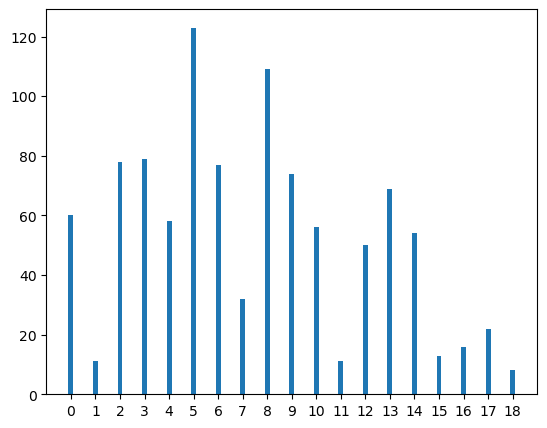

In [18]:
fig,ax=plt.subplots(figsize=(number_of_bins/3,5))

h = ax.hist(bin_num,bins=np.arange(number_of_bins+1),rwidth=0.2,align="left")
ax.set_xticks(np.arange(number_of_bins))
ax.set_xlim(-1,number_of_bins)
plt.show()

In [19]:
print("Counts",len(h[0]), h[0],sep="\n")
print("\n")
print("Bin edges", len(h[1]), h[1],sep="\n")

Counts
19
[ 60.  11.  78.  79.  58. 123.  77.  32. 109.  74.  56.  11.  50.  69.
  54.  13.  16.  22.   8.]


Bin edges
20
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [25]:
assert np.all(h[0]==nPixels)

In [21]:
stat,edges,bin_number = stats.binned_statistic(x = bin_num,
                               values = None,
                               bins = np.arange(number_of_bins+1),
                               statistic="count")

In [22]:
print("Stat",len(stat), stat,sep="\n")
print("\n")
print("Edges", len(edges), edges,sep="\n")

Stat
19
[ 60.  11.  78.  79.  58. 123.  77.  32. 109.  74.  56.  11.  50.  69.
  54.  13.  16.  22.   8.]


Edges
20
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


In [40]:
assert np.all(stat==h[0]) == np.all(h[1]==edges) == np.all(bin_number-1 == bin_num)

#### voronoi regions

In [3]:
# Generate sample data: x, y
N = 100
np.random.seed(10)
x = np.concatenate((np.random.normal(loc=-2,size=N), np.random.normal(loc=2,size=N)))
y = np.concatenate((np.random.normal(loc=-2,size=N), np.random.normal(loc=2,size=N)))

# Define constant signal and noise
signal = np.ones(len(x))
noise = np.ones(len(x))

min_number_of_stars = 5
target_sn = np.sqrt(min_number_of_stars)
pixelsize=0.5

# Perform Voronoi binning
bin_num, x_gen,y_gen, x_bar, y_bar, sn, nPixels, scale = voronoi_2d_binning(
    x, y, signal, noise, target_sn, pixelsize=pixelsize, plot=False)

number_of_bins = max(bin_num) + 1

stat,_,_ = stats.binned_statistic(x = bin_num,
                               values = None,
                               bins = np.arange(number_of_bins+1),
                               statistic="count")

stat = stat[sn >= target_sn]
x_bar = x_bar[sn >= target_sn]
y_bar = y_bar[sn >= target_sn]

# Perform Voronoi tessellation
points = np.column_stack((x_bar, y_bar))
vor = Voronoi(points)

In [138]:
print(f"{len(vor.regions)} vor.regions", vor.regions, "\n", f"{len(vor.vertices)} vor.vertices", vor.vertices, "\n", f"{len(points)} input points", points, "\n",
      f"{len(vor.point_region)} vor.point_region", vor.point_region, sep="\n")

27 vor.regions
[[], [4, 2, -1, 3], [13, 3, 4, 5, 12], [16, 10, 9, -1, 15], [21, 17, 19, 18, 20], [21, 8, 10, 9, 17], [19, 14, 13, 3, -1, 9, 17], [23, 0, 1, -1, 2, 22], [24, 11, 6, 7, 0, 23], [31, 27, 29, 28, 26, 25, 30], [26, 14, 13, 12, 25], [30, 5, 12, 25], [28, 18, 19, 14, 26], [31, 22, 23, 24, 27], [29, 11, 24, 27], [29, 11, 6, 20, 18, 28], [31, 22, 2, 4, 5, 30], [34, 16, 10, 8, 32], [36, 7, 0, 1, 35], [37, 33, 32, 8, 21, 20, 6, 7, 36], [43, 40, 38, 39, 41, 42], [39, 34, 32, 33, 38], [40, 37, 33, 38], [41, 15, 16, 34, 39], [43, 35, 36, 37, 40], [42, -1, 15, 41], [43, 35, 1, -1, 42]]


44 vor.vertices
[[ -6.23996637   5.18116152]
 [-61.71477222  61.75854447]
 [ -3.55763794  -2.51367578]
 [ -1.39402377  -4.66287747]
 [ -3.46936843  -2.53916465]
 [ -2.65969193  -2.37086962]
 [ -0.27280798   0.44940773]
 [ -0.53682131   0.85420936]
 [  1.55360573   0.90249681]
 [  5.63688707  -5.14495763]
 [  2.65673697   0.75768909]
 [ -1.52438572  -0.71730489]
 [ -2.06787664  -2.5769682 ]
 [ -1.39382

#### My cleaning

In [4]:
# Clean infinity cell
if [] in vor.regions:
    for i, reg in enumerate(vor.regions):
        if reg == []:
            inf_idx = i
            break
    vor.regions.remove([])
    vor.point_region[vor.point_region > inf_idx] -= 1

# The indices of the bins as returned by vonbin.voronoi_2d_binning are not in the same order as listed in vor.regions, hence we need vor.point_region to map between them
region_stats = np.zeros(len(stat))
for input_idx,region_idx in enumerate(vor.point_region):
    region_stats[region_idx] = stat[input_idx]

In [67]:
print(f"{len(vor.regions)} vor.regions", vor.regions, "\n", f"{len(vor.vertices)} vor.vertices", vor.vertices, "\n", f"{len(points)} input points", points, "\n",
      f"{len(vor.point_region)} vor.point_region", vor.point_region, sep="\n")

26 vor.regions
[[4, 2, -1, 3], [13, 3, 4, 5, 12], [16, 10, 9, -1, 15], [21, 17, 19, 18, 20], [21, 8, 10, 9, 17], [19, 14, 13, 3, -1, 9, 17], [23, 0, 1, -1, 2, 22], [24, 11, 6, 7, 0, 23], [31, 27, 29, 28, 26, 25, 30], [26, 14, 13, 12, 25], [30, 5, 12, 25], [28, 18, 19, 14, 26], [31, 22, 23, 24, 27], [29, 11, 24, 27], [29, 11, 6, 20, 18, 28], [31, 22, 2, 4, 5, 30], [34, 16, 10, 8, 32], [36, 7, 0, 1, 35], [37, 33, 32, 8, 21, 20, 6, 7, 36], [43, 40, 38, 39, 41, 42], [39, 34, 32, 33, 38], [40, 37, 33, 38], [41, 15, 16, 34, 39], [43, 35, 36, 37, 40], [42, -1, 15, 41], [43, 35, 1, -1, 42]]


44 vor.vertices
[[ -6.23996637   5.18116152]
 [-61.71477222  61.75854447]
 [ -3.55763794  -2.51367578]
 [ -1.39402377  -4.66287747]
 [ -3.46936843  -2.53916465]
 [ -2.65969193  -2.37086962]
 [ -0.27280798   0.44940773]
 [ -0.53682131   0.85420936]
 [  1.55360573   0.90249681]
 [  5.63688707  -5.14495763]
 [  2.65673697   0.75768909]
 [ -1.52438572  -0.71730489]
 [ -2.06787664  -2.5769682 ]
 [ -1.39382604 

#### plotting

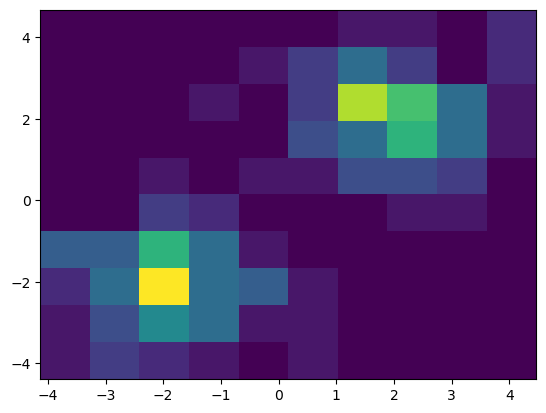

In [69]:
plt.hist2d(x=x,y=y,bins=10);plt.show()

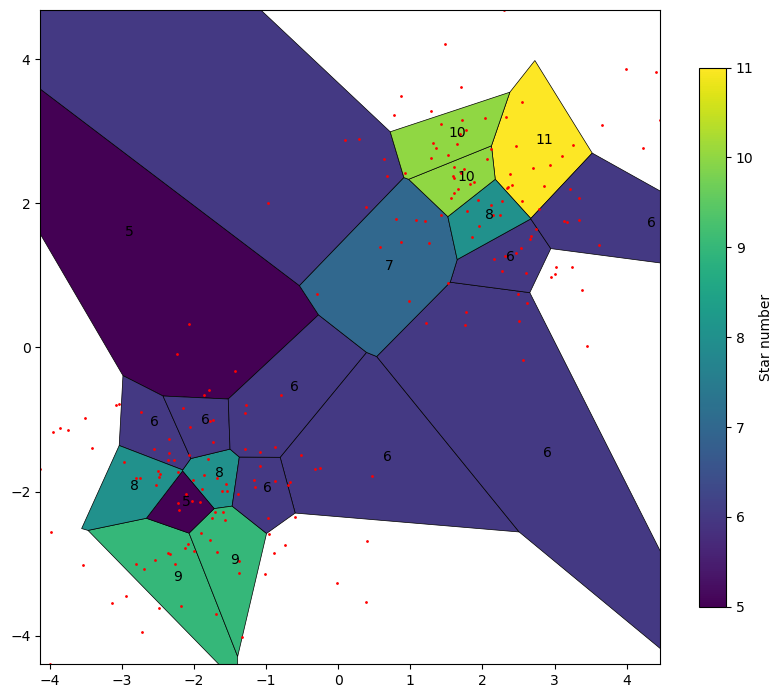

In [5]:
#Plotting
if True: #fig, aspects, scipy plot
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')

# Plot Voronoi diagram
cmap = cm.viridis
norm = plt.Normalize(region_stats.min(), region_stats.max())

for (cell_vertices, nStars) in zip(vor.regions, region_stats):
    if -1 in cell_vertices:
        continue
    polygon = vor.vertices[cell_vertices]
    poly = plt.Polygon(polygon, edgecolor="k", lw=0.5, facecolor=cmap(norm(nStars)))
    ax.add_patch(poly)
    
    centroid = Polygon(polygon).centroid
    
    if centroid.x > x.min()-1 and centroid.x < x.max() + 1 and centroid.y > y.min()-1 and centroid.y < y.max()+1:
        ax.text(centroid.x,centroid.y,color="k",s="%i"%nStars)

if True: # scatter, lims
    # Scatter plot with fixed red color
    ax.scatter(x,y,s=1,color="red",label="Data")

    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
#     ax.scatter(x_bar,y_bar,s=10,c="blue",label="Vorbin centroids")
#     ax.scatter(vor.vertices[:,0],vor.vertices[:,1],s=10,c="cyan",label="Voronoi vertices")
    
#     example_ridge = vor.ridge_vertices[10]
#     example_ridge_vertex1 = vor.vertices[example_ridge[0]]
#     example_ridge_vertex2 = vor.vertices[example_ridge[1]]
#     ax.plot([example_ridge_vertex1[0], example_ridge_vertex2[0]], [example_ridge_vertex1[1], example_ridge_vertex2[1]],c="lime")
    
#     ax.set(xlabel=r"$x$ [kpc]",ylabel=r"$y$ [kpc]")
    
#     ax.legend()
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Star number',shrink=0.7)
    plt.show()

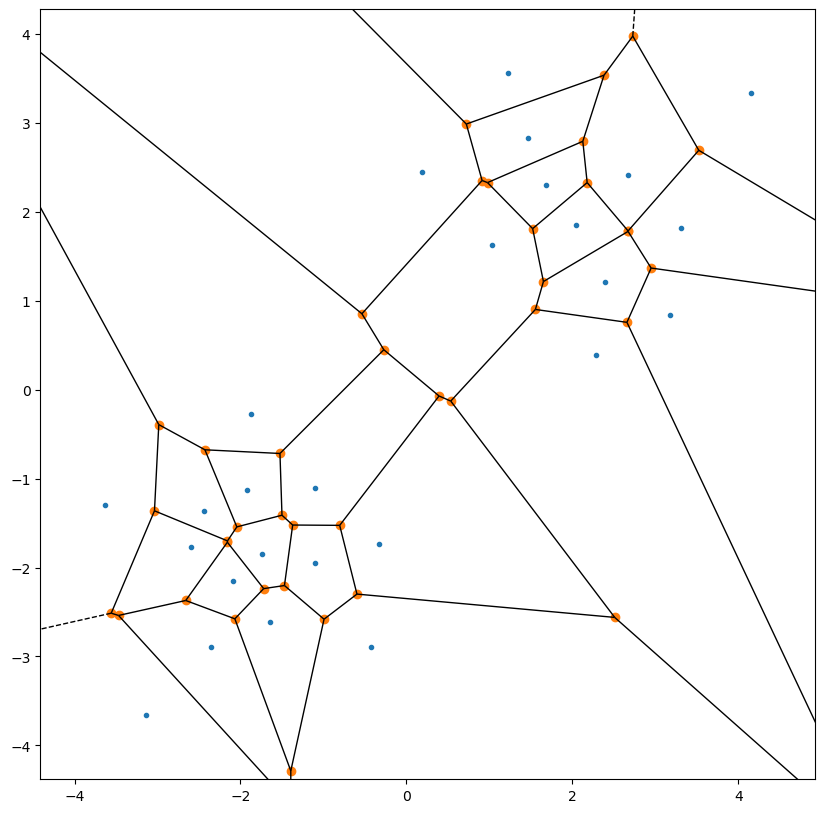

In [7]:
fig,ax1=plt.subplots(figsize=(10,10))
voronoi_plot_2d(vor,ax1)
# lim = 10
# ax1.set_xlim(-lim,lim);ax1.set_ylim(-lim,lim)
plt.show()

### Finding points inside polygon later

In [6]:
dummy_df = pd.DataFrame([[1,2,3],[2,3,1],[6,3,4],[6,3,4]], columns=['a','b','c'])

In [98]:
def generate_2Dvor_regions(df,min_number_stars,remove_unbound_regions=True,pixelsize=0.5,vorbinplot=False):
    # total input number
    N = len(df)
    x_values = df.x.values
    y_values = df.y.values
    
    # Define constant signal and noise
    signal = np.ones(N)
    noise = np.ones(N)
    
    # Define target signal to noise ratio
    target_sn = np.sqrt(min_number_stars)
    
    # Perform Voronoi binning
    _,_,_, x_bar, y_bar, sn, *others = voronoi_2d_binning(
        x_values, y_values, signal, noise, target_sn, pixelsize=pixelsize, plot=vorbinplot)

    x_bar = x_bar[sn >= target_sn]
    y_bar = y_bar[sn >= target_sn]

    # Perform Voronoi tessellation
    points = np.column_stack((x_bar, y_bar))
    vor = Voronoi(points)

    # Clean cell at infinity
    if [] in vor.regions:
        for i, reg in enumerate(vor.regions):
            if reg == []:
                inf_idx = i
                break
        vor.regions.remove([])
        
    # Remove unbound cells
    if remove_unbound_regions:
        idx = 0
        while idx < len(vor.regions):
            if -1 in vor.regions[idx]:
                vor.regions.remove(vor.regions[idx])
            else:
                idx += 1
                
    point_region = np.full(shape=(N),fill_value=-9999)
    input_points = np.column_stack([x_values,y_values])

    for i, cell_vertices in enumerate(vor.regions):
        if -1 in cell_vertices and remove_unbound_regions:
            raise ValueError("Unexpected -1 in region vertices")
        polygon = vor.vertices[cell_vertices]

        path = mpltPath.Path(polygon)
        points_inside = path.contains_points(input_points)

        point_region[points_inside] = i

    assert not -9999 in point_region, "There are some -9999 left"
    
    return vor, point_region
    
def compute_region_values(vor, df, point_region, compute_variable_function="count"):
    computed_values = np.full(shape=(len(vor.regions)),fill_value=-9999)

    for i, cell_vertices in enumerate(vor.regions):
        if -1 in cell_vertices:
            raise ValueError("Unexpected -1 in region vertices")
        polygon = vor.vertices[cell_vertices]
        
        if compute_variable_function == "count":
            computed_value = np.sum([point_region == i])
        else:
            computed_value = compute_variable_function(df.iloc[point_region == i])
    
    assert not -9999 in point_region, "There are some -9999 left"
    
    return computed_values
    
def plot_voronoi_map(vor, region_values, ax, cbar=False,cmap="viridis",value_text=False, replace_plot_scipy=False):
    
    if replace_plot_scipy:
        voronoi_plot_2d(vor,ax)
        return
        
    norm = plt.Normalize(region_values.min(), region_values.max())
    
    for (cell_vertices,region_values) in enumerate(zip(vor.regions,region_values)):
        if -1 in cell_vertices:
            raise ValueError("Unexpected -1 in region vertices")
        polygon = vor.vertices[cell_vertices]

        value = region_values[i]

        poly = plt.Polygon(polygon, edgecolor="k", lw=0.5, facecolor=cmap(norm(value)))
        ax.add_patch(poly)

        if value_text:
            centroid = Polygon(polygon).centroid
            if centroid.x > x.min()-1 and centroid.x < x.max() + 1 and centroid.y > y.min()-1 and centroid.y < y.max()+1:
                ax.text(centroid.x,centroid.y,color="k",s="%i"%value)
                
    if cbar:
        plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Star number',shrink=0.7)

def dynamical_binning_plot(df,min_number_stars,ax,remove_unbound_regions=True,pixelsize=0.5,vorbinplot=False,replace_plot_scipy=False,compute_variable_function="counts",cmap="viridis",cbar=False,value_text=False):
    vor, point_region = generate_2Dvor_regions(df,min_number_stars,remove_unbound_regions=remove_unbound_regions,pixelsize=pixelsize,vorbinplot=vorbinplot)
    computed_values = compute_region_values(vor, df, point_region, compute_variable_function=compute_variable_function)
    plot_voronoi_map(vor, region_values, ax, cmap=cmap,value_text=value_text,replace_plot_scipy=replace_plot_scipy)
    
    return computed_values

In [55]:
# Generate sample data: x, y
N = 100
np.random.seed(10)
x = np.concatenate((np.random.normal(loc=-2,size=N), np.random.normal(loc=2,size=N)))
y = np.concatenate((np.random.normal(loc=-2,size=N), np.random.normal(loc=2,size=N)))

# Define constant signal and noise
signal = np.ones(len(x))
noise = np.ones(len(x))

min_number_of_stars = 5
target_sn = np.sqrt(min_number_of_stars)
pixelsize=0.5

# Perform Voronoi binning
bin_num, x_gen,y_gen, x_bar, y_bar, sn, nPixels, scale = voronoi_2d_binning(
    x, y, signal, noise, target_sn, pixelsize=pixelsize, plot=False)

x_bar = x_bar[sn >= target_sn]
y_bar = y_bar[sn >= target_sn]

# Perform Voronoi tessellation
points = np.column_stack((x_bar, y_bar))
vor = Voronoi(points)

# Clean infinity cell
if [] in vor.regions:
    for i, reg in enumerate(vor.regions):
        if reg == []:
            inf_idx = i
            break
    vor.regions.remove([])

In [56]:
# Get point_region
point_region = np.full(shape=(len(x)),fill_value=-9999)

input_points = np.column_stack([x,y])

for i, cell_vertices in enumerate(vor.regions):
    if -1 in cell_vertices:
        continue
    polygon = vor.vertices[cell_vertices]
    
    path = mpltPath.Path(polygon)
    points_inside = path.contains_points(input_points)
    
    point_region[points_inside] = i

# assert not np.any(point_region == -9999), "There are some -9999 left"

_, counts = np.unique(point_region[point_region > 0], return_counts=True)

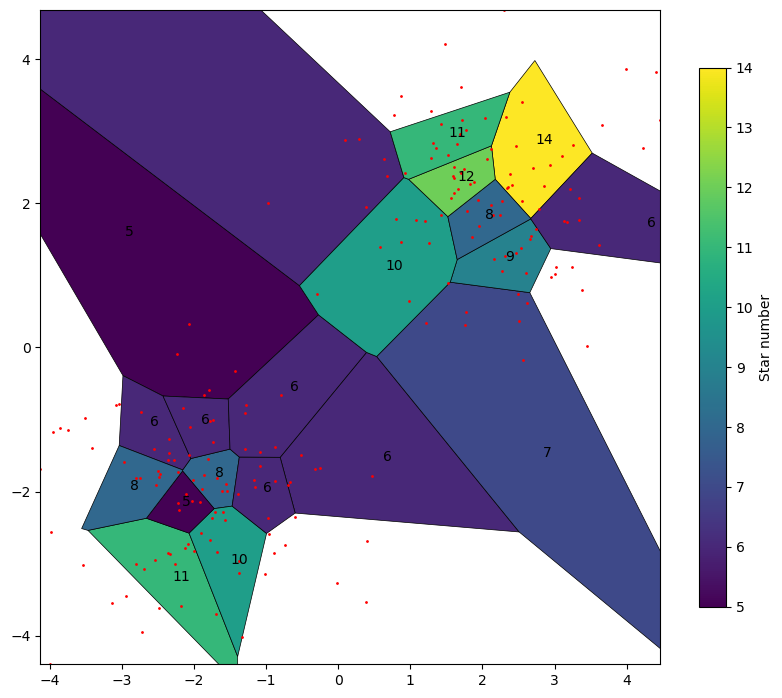

In [63]:
#Plotting
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

# Plot Voronoi diagram
cmap = cm.viridis
norm = plt.Normalize(counts.min(), counts.max())

for i, cell_vertices in enumerate(vor.regions):
    if -1 in cell_vertices:
        continue
    polygon = vor.vertices[cell_vertices]
    
    n_stars = np.sum(point_region == i)
    
    poly = plt.Polygon(polygon, edgecolor="k", lw=0.5, facecolor=cmap(norm(n_stars)))
    ax.add_patch(poly)
    
    centroid = Polygon(polygon).centroid
    
    if centroid.x > x.min()-1 and centroid.x < x.max() + 1 and centroid.y > y.min()-1 and centroid.y < y.max()+1:
        ax.text(centroid.x,centroid.y,color="k",s="%i"%n_stars)

if True: # scatter, lims
    # Scatter plot with fixed red color
    ax.scatter(x,y,s=1,color="red",label="Data")

    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
#     ax.scatter(x_bar,y_bar,s=10,c="blue",label="Vorbin centroids")
#     ax.scatter(vor.vertices[:,0],vor.vertices[:,1],s=10,c="cyan",label="Voronoi vertices")
    
#     example_ridge = vor.ridge_vertices[10]
#     example_ridge_vertex1 = vor.vertices[example_ridge[0]]
#     example_ridge_vertex2 = vor.vertices[example_ridge[1]]
#     ax.plot([example_ridge_vertex1[0], example_ridge_vertex2[0]], [example_ridge_vertex1[1], example_ridge_vertex2[1]],c="lime")
    
#     ax.set(xlabel=r"$x$ [kpc]",ylabel=r"$y$ [kpc]")
    
#     ax.legend()
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Star number',shrink=0.7)
    plt.show()

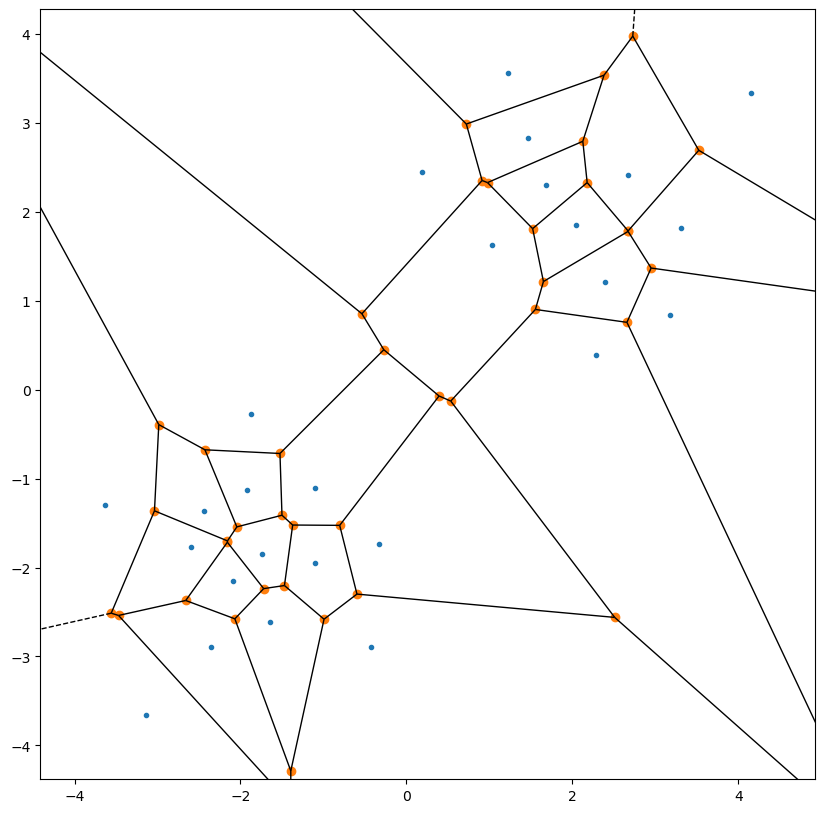

In [58]:
fig,ax1=plt.subplots(figsize=(10,10))
voronoi_plot_2d(vor,ax1)
# lim = 10
# ax1.set_xlim(-lim,lim);ax1.set_ylim(-lim,lim)
plt.show()

## Joining voronoi cells together
Needs reflecting result in plot, as right now just shows normal voronoi

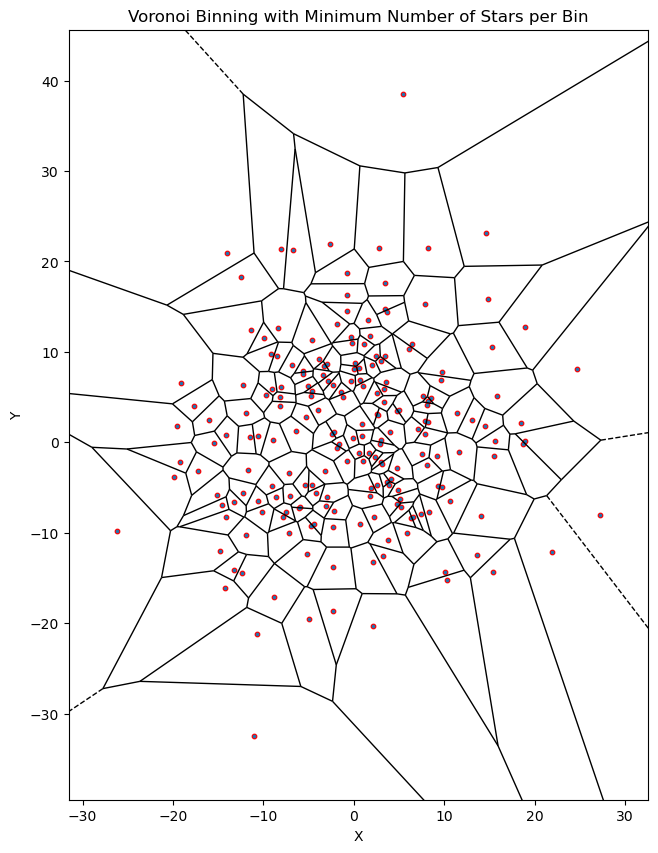

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate synthetic data
np.random.seed(42)
num_points = 200
x = np.random.normal(0, 10, num_points)
y = np.random.normal(0, 10, num_points)

# Create Voronoi tessellation
points = np.column_stack((x, y))
vor = Voronoi(points)

# Post-process Voronoi cells to ensure a minimum number of stars per cell
min_stars_per_bin = 10
bin_num = np.array(vor.point_region)

# Merge cells with fewer than the minimum number of stars
unique_bins, counts = np.unique(bin_num, return_counts=True)
for bin_index, count in zip(unique_bins, counts):
    if count < min_stars_per_bin:
        nearest_bin = unique_bins[np.argmin(np.abs(counts - min_stars_per_bin))]
        bin_num[bin_num == bin_index] = nearest_bin

# Plot Voronoi diagram with the post-processed cells
fig, ax = plt.subplots(figsize=(10,10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, point_size=3)
ax.scatter(x, y, c="red",s=10)
ax.set_aspect("equal")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Voronoi Binning with Minimum Number of Stars per Bin")

plt.show()